
Data Sample:
   Booking ID Flight Number Customer Name Booking Date Departure Date  \
0           1         AA101         Alice   2023-01-01     2023-01-05   
1           2         AA101           Bob   2023-01-02     2023-01-06   
2           3         BB202       Charlie   2023-01-03     2023-01-07   
3           4         BB202         David   2023-01-04     2023-01-08   
4           5         CC303           Eva   2023-01-05     2023-01-09   

   Ticket Price       Information Cancel Duration  
0           200           No info   True   4 days  
1           250  No meal included   True   4 days  
2           300           No info  False   4 days  
3           150     Meal included   True   4 days  
4           400  No meal included  False   4 days  

Summary Statistics:
       Booking ID         Booking Date       Departure Date  Ticket Price  \
count    10.00000                   10                   10       10.0000   
mean      5.50000  2023-01-05 12:00:00  2023-01-09 12:00:00 

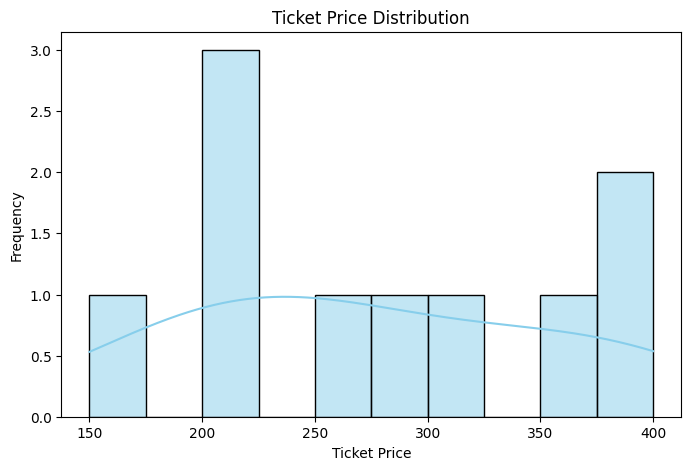

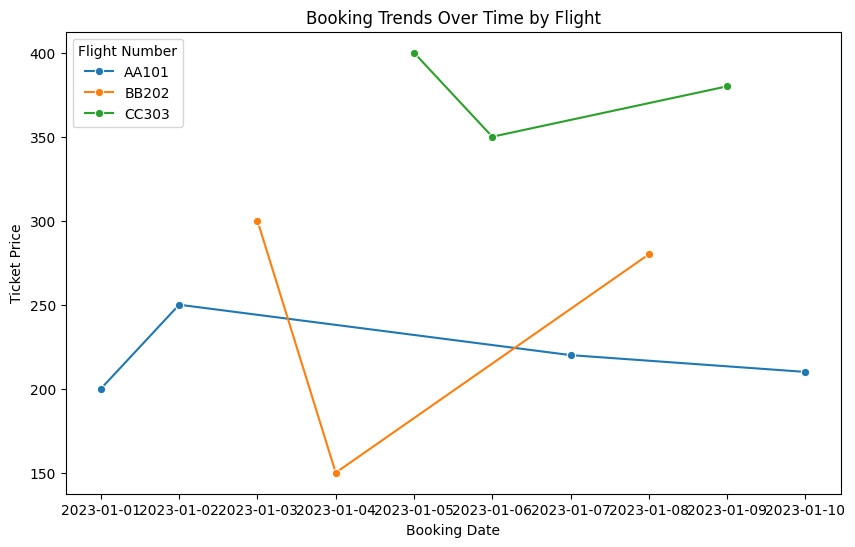


Total Revenue by Flight:
  Flight Number  Ticket Price
0         AA101           880
1         BB202           730
2         CC303          1130


C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\2297304864.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_flight, x="Flight Number", y="Ticket Price", palette="viridis")


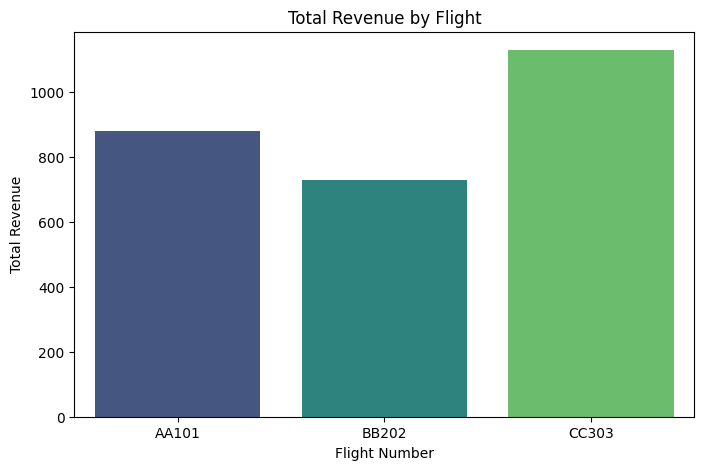


Price Statistics by Flight:
  Flight Number  Mean Price  Price Std Dev
0         AA101  220.000000      21.602469
1         BB202  243.333333      81.445278
2         CC303  376.666667      25.166115


C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\2297304864.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=price_stats, x="Flight Number", y="Mean Price", palette="coolwarm", capsize=0.2)


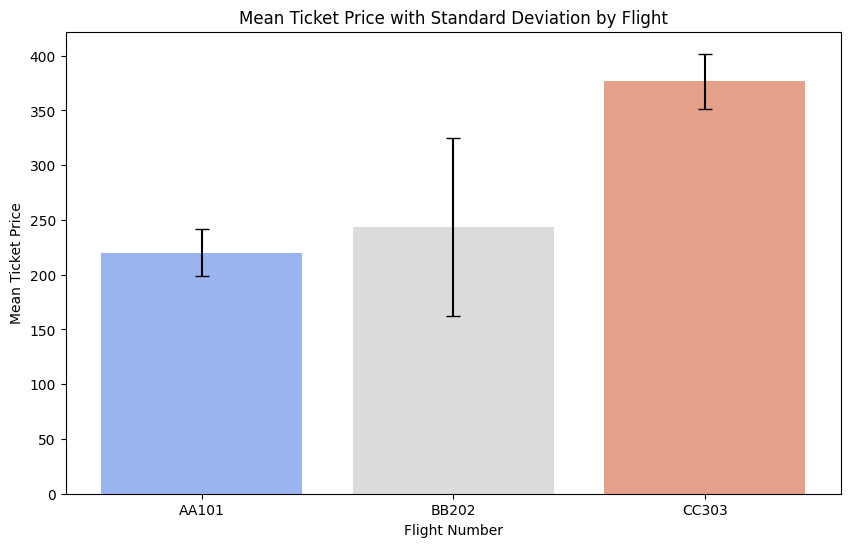

In [8]:
# Online Air Ticket Booking System Analysis with Numpy, Pandas, and Matplotlib

## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simulated Air Ticket Booking Dataset
# Replace this simulated dataset with the actual dataset file path if available.

data = {
    "Booking ID": range(1, 11),
    "Flight Number": ["AA101", "AA101", "BB202", "BB202", "CC303", "CC303", "AA101", "BB202", "CC303", "AA101"],
    "Customer Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Hannah", "Ivy", "Jack"],
    "Booking Date": pd.date_range(start="2023-01-01", periods=10, freq="D"),
    "Departure Date": pd.date_range(start="2023-01-05", periods=10, freq="D"),
    "Ticket Price": [200, 250, 300, 150, 400, 350, 220, 280, 380, 210]
    
}
n = len(data['Booking ID'])
data['Information'] = np.random.choice(['No info','Meal included','No meal included'],n)
data['Cancel'] = np.random.choice(['True','False'], n)

df = pd.DataFrame(data)
df['Duration'] = df['Departure Date'] - df['Booking Date']
## Exploratory Data Analysis
print("\nData Sample:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

## Data Visualization
# Ticket Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Ticket Price"], kde=True, bins=10, color="skyblue")
plt.title("Ticket Price Distribution")
plt.xlabel("Ticket Price")
plt.ylabel("Frequency")
plt.show()

# Booking Trends Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Booking Date", y="Ticket Price", hue="Flight Number", marker="o")
plt.title("Booking Trends Over Time by Flight")
plt.xlabel("Booking Date")
plt.ylabel("Ticket Price")
plt.legend(title="Flight Number")
plt.show()

## Revenue Analysis
# Total Revenue by Flight
revenue_by_flight = df.groupby("Flight Number")["Ticket Price"].sum().reset_index()
print("\nTotal Revenue by Flight:")
print(revenue_by_flight)

plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_flight, x="Flight Number", y="Ticket Price", palette="viridis")
plt.title("Total Revenue by Flight")
plt.xlabel("Flight Number")
plt.ylabel("Total Revenue")
plt.show()

## Advanced Analysis: Price Variation by Flight
# Calculate mean and standard deviation of ticket prices by flight
price_stats = df.groupby("Flight Number")["Ticket Price"].agg(["mean", "std"]).reset_index()
price_stats.rename(columns={"mean": "Mean Price", "std": "Price Std Dev"}, inplace=True)
print("\nPrice Statistics by Flight:")
print(price_stats)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=price_stats, x="Flight Number", y="Mean Price", palette="coolwarm", capsize=0.2)
ax.errorbar(x=range(len(price_stats)), y=price_stats["Mean Price"], yerr=price_stats["Price Std Dev"], fmt="none", c="black", capsize=5)
plt.title("Mean Ticket Price with Standard Deviation by Flight")
plt.xlabel("Flight Number")
plt.ylabel("Mean Ticket Price")
plt.show()

## Conclusion
# The analysis provides insights into ticket price distributions, booking trends, and revenue generation by flight. Further analysis could include customer segmentation or forecasting ticket demand based on historical trends.
